# Exploratory Data Analysis

## Imports

In [97]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [98]:
# Load the dataset

file_path = '../data/clean_data.csv'
df = pd.read_csv(file_path)

print('Data size',df.shape)
df.head()

Data size (40000, 14)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  class      40000 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 4.3+ MB


## Class Distribution

In [100]:
label_pct = df['class'].value_counts(normalize = True)*100
label_ct =  df['class'].value_counts()
pd.DataFrame({'labels': label_pct.index, 'count': label_ct.values, 'percentage': label_pct.values})

,labels,count,percentage
0,0,37104,92.76
1,1,2896,7.24


## Descriptive Statistics

In [101]:
df.drop('class', axis =1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


### Age Vs Target

- Ages 85, 90 and 95 had 100% Term deposit subcription rate, howeever there only 3 customers age 85 and one customer each of ages 90 and 95
- Ages 61 to 79 had good amount of subscription rate

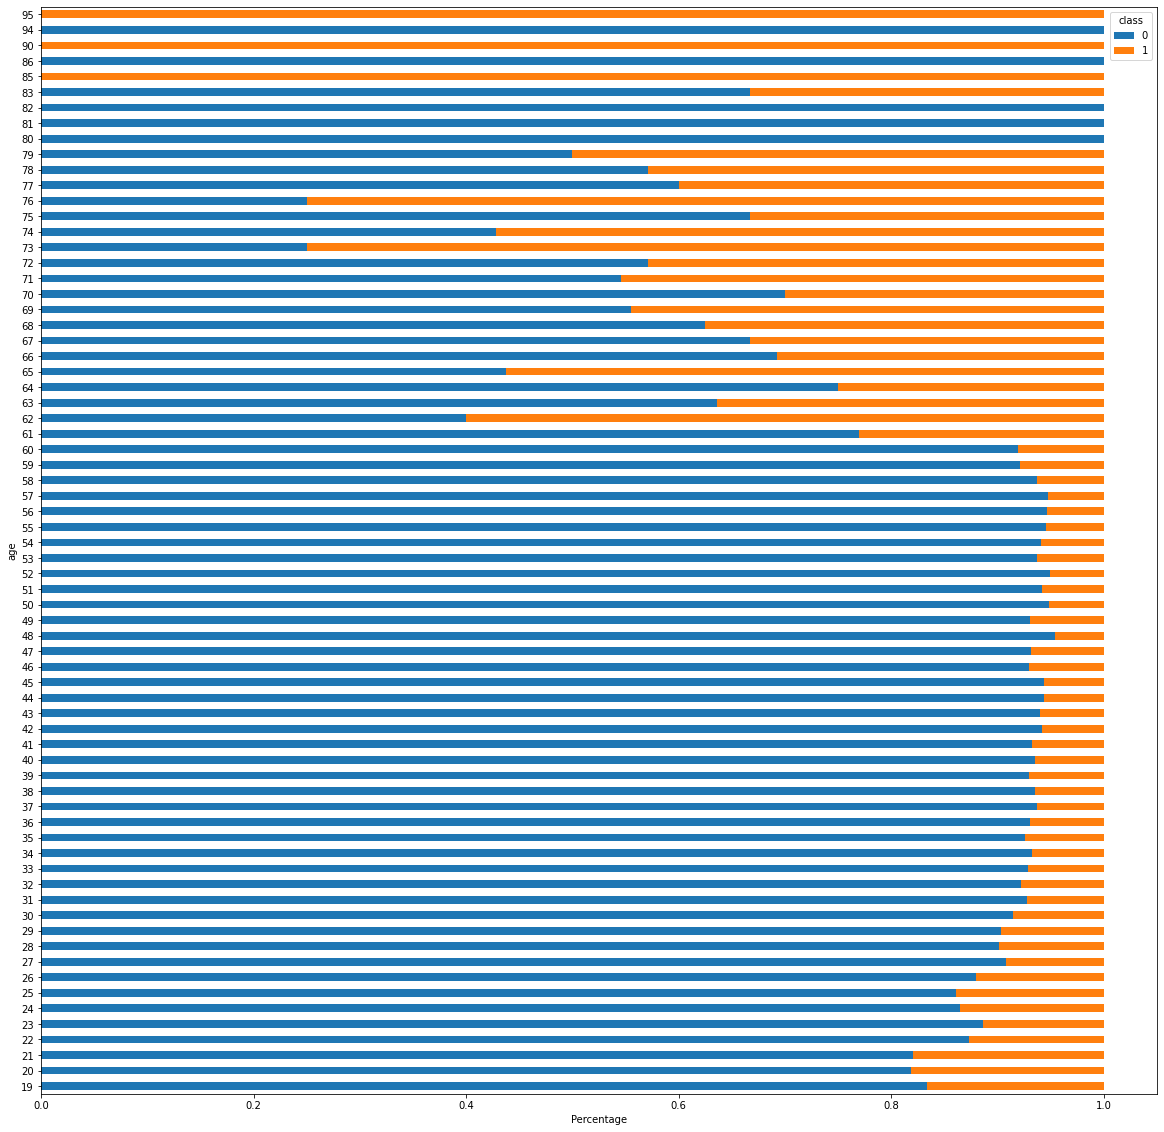

In [102]:
pvt_age = pd.crosstab(index = df['age'], columns = df['class'], normalize= 'index')
pvt_age.plot(kind = 'barh', stacked = True, figsize = (20,20))
plt.xlabel('Percentage')
plt.show()

In [122]:
count85 = (df['age'] == 85).sum()
count90 = (df['age'] == 90).sum()
count95 = (df['age'] == 95).sum()
print(f"The count of customers 85 years old is: {count85}")
print(f"The count of customers 90 years old is: {count90}")
print(f"The count of customers 95 years old is: {count95}")

The count of customers 85 years old is: 3
The count of customers 90 years old is: 1
The count of customers 95 years old is: 1


### Marital vs Target

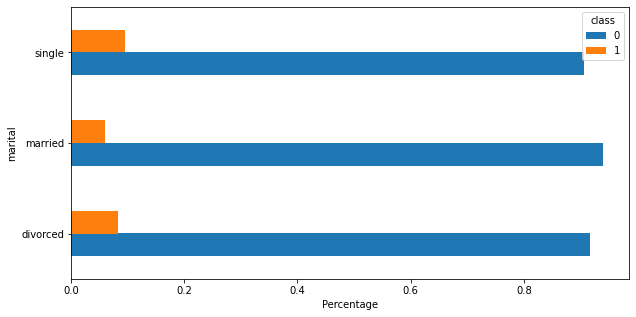

In [103]:
pvt_marital = pd.crosstab(index = df['marital'], columns = df['class'], normalize= 'index')
pvt_marital.plot(kind = 'barh', stacked = False, figsize = (10,5))
plt.xlabel('Percentage')
plt.show()

### Default Vs Target

- Customers who dont default have slighly greater chance of subscription rate

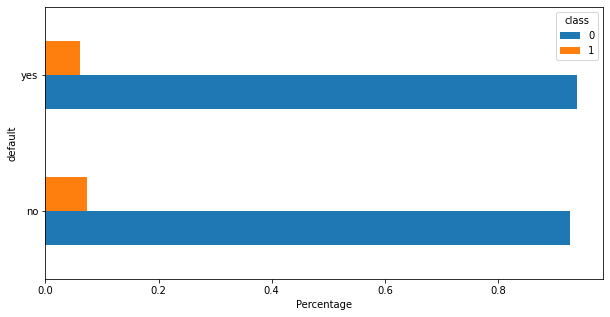

In [104]:
pvt_default = pd.crosstab(index = df['default'], columns = df['class'], normalize= 'index')
pvt_default.plot(kind = 'barh', stacked = False, figsize = (10,5))
plt.xlabel('Percentage')
plt.show()

### Balance Vs Target

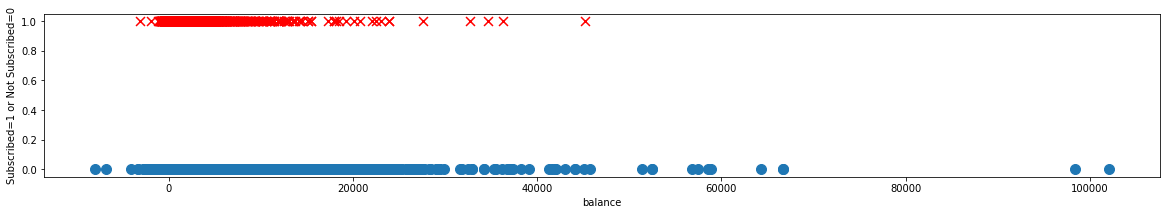

In [105]:

pos = df['class'].to_numpy() == 1
neg = df['class'].to_numpy() == 0
# Target vs features
fig,ax=plt.subplots(1, 1, figsize=(20, 3), sharey=True)
ax.scatter(df["balance"].to_numpy()[pos], df['class'].to_numpy()[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(df["balance"].to_numpy()[neg], df['class'].to_numpy()[neg], marker='o', s=100, label="y=0")
ax.set_xlabel('balance')
ax.set_ylabel("Subscribed=1 or Not Subscribed=0")
plt.show()

### Housing Vs Target

- Customers without housing has slighly greater chance of subscribing to term deposit

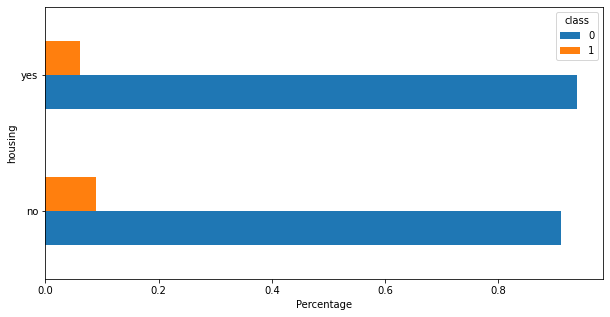

In [106]:
pvt_housing = pd.crosstab(index = df['housing'], columns = df['class'], normalize= 'index')
pvt_housing.plot(kind = 'barh', stacked = False, figsize = (10,5))
plt.xlabel('Percentage')
plt.show()

### Loan Vs Target

- Customers without loans has slighly greater chance of subscribing to term deposit

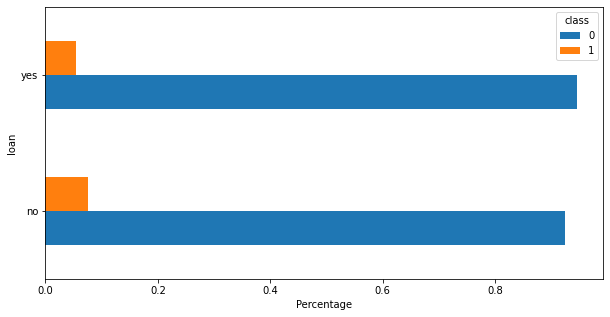

In [107]:
pvt_loan = pd.crosstab(index = df['loan'], columns = df['class'], normalize= 'index')
pvt_loan.plot(kind = 'barh', stacked = False, figsize = (10,5))
plt.xlabel('Percentage')
plt.show()

### Term rate per day

- On average, students are more likely to subscribe to term deposit
- On average, Customers without housing are more likely to subscribe to term deposit
- Divorced customers are the least likely to subscribe to term deposit

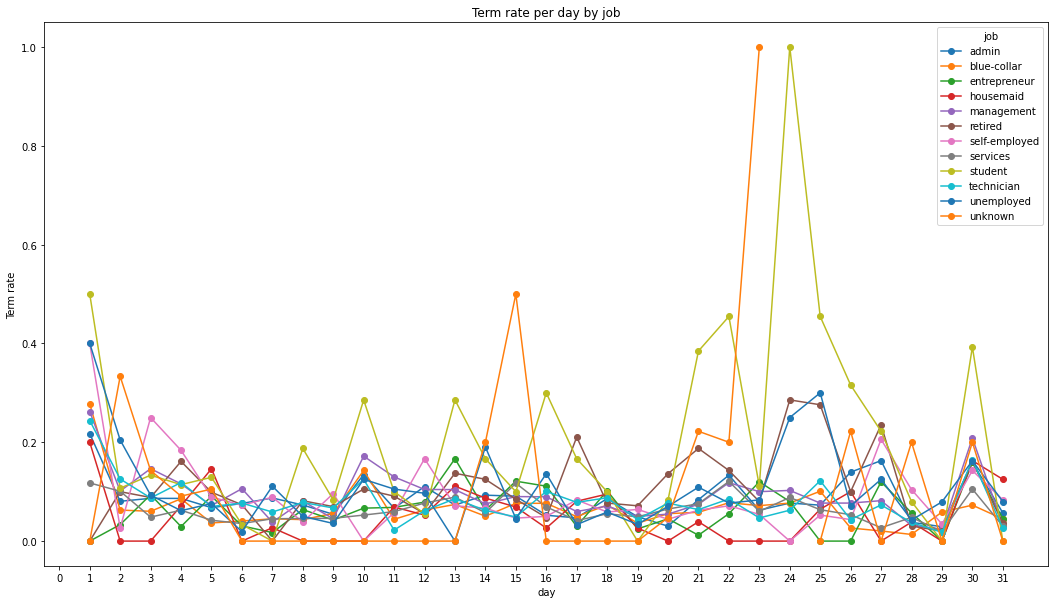

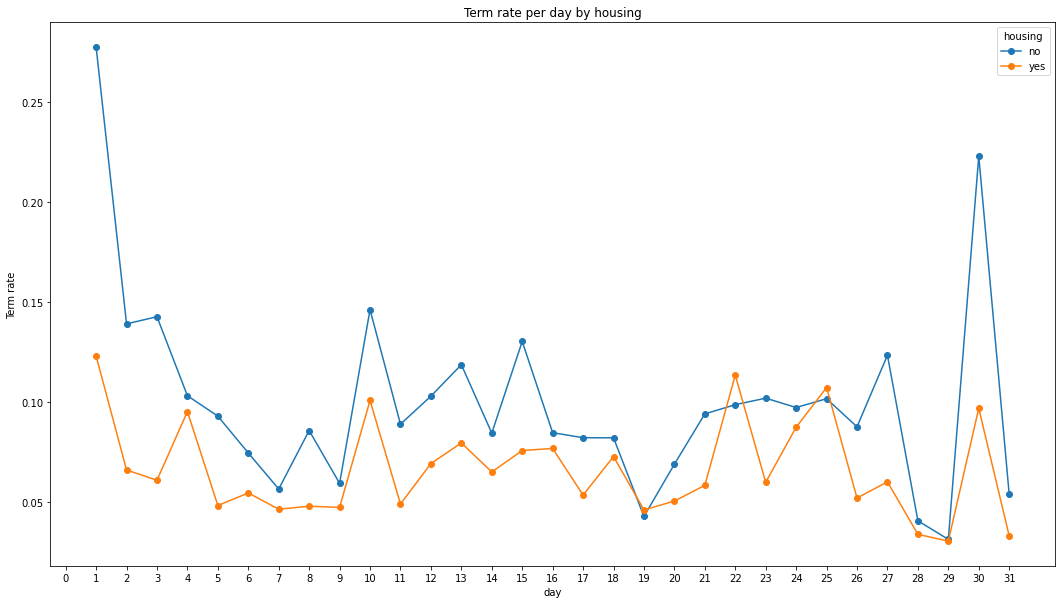

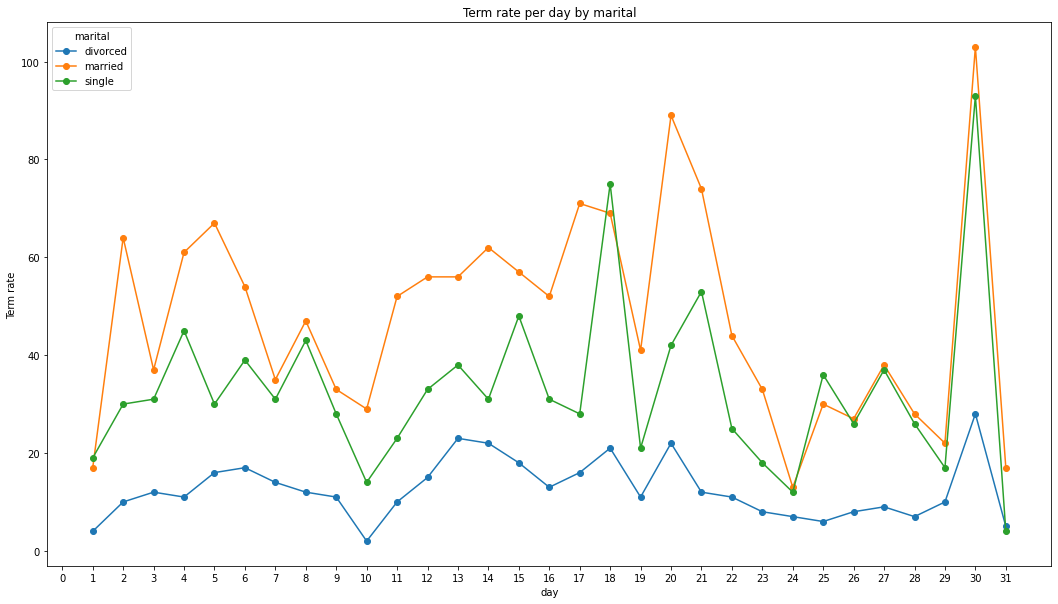

In [127]:
pivot_tab_day1 = df.pivot_table('class', index = 'day', columns = 'job', aggfunc = 'mean')
pivot_tab_day2 = df.pivot_table('class', index = 'day', columns = 'housing', aggfunc = 'mean')
pivot_tab_day3 = df.pivot_table('class', index = 'day', columns = 'marital', aggfunc = 'sum')

# plots
pivot_tab_day1.plot(marker = 'o', figsize = (18,10))
plt.xlabel('day')
plt.ylabel('Term rate')
plt.title('Term rate per day by job')
plt.xticks(np.arange(32))
plt.show()


# plots
pivot_tab_day2.plot(marker = 'o', figsize = (18,10))
plt.xlabel('day')
plt.ylabel('Term rate')
plt.title('Term rate per day by housing')
plt.xticks(np.arange(32))
plt.show()

# plots
pivot_tab_day3.plot(marker = 'o', figsize = (18,10))
plt.xlabel('day')
plt.ylabel('Term rate')
plt.title('Term rate per day by marital')
plt.xticks(np.arange(32))
plt.show()

### Term rate per month

- There are more subscribtion between April and August, with the highest rates in may


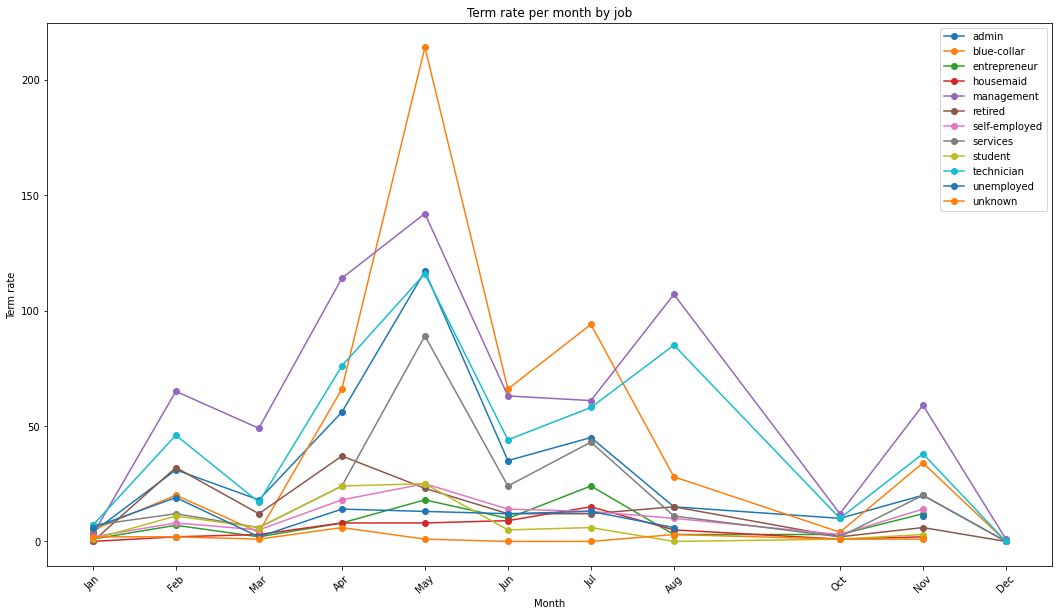

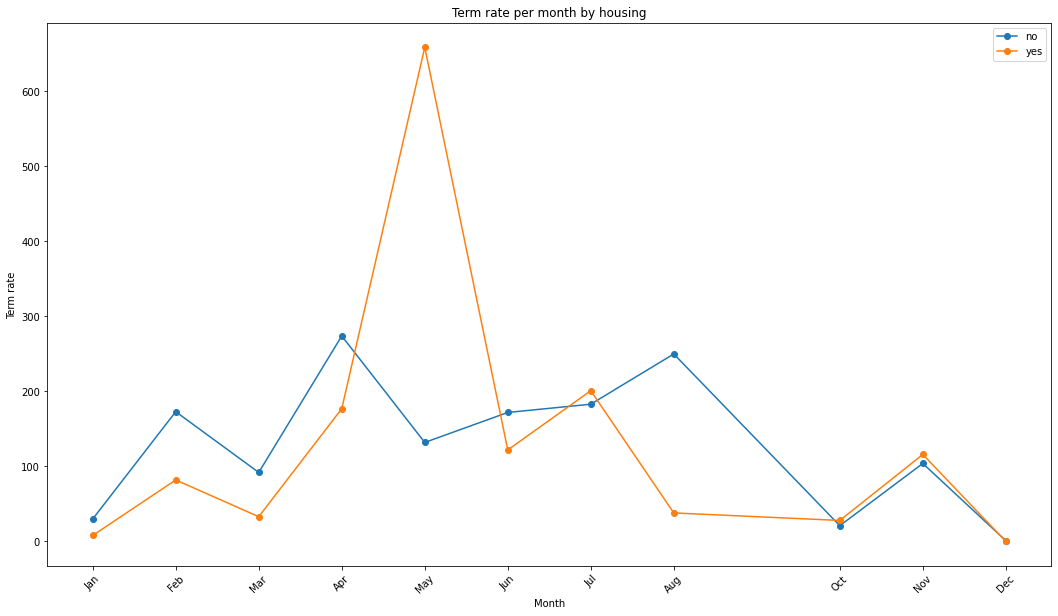

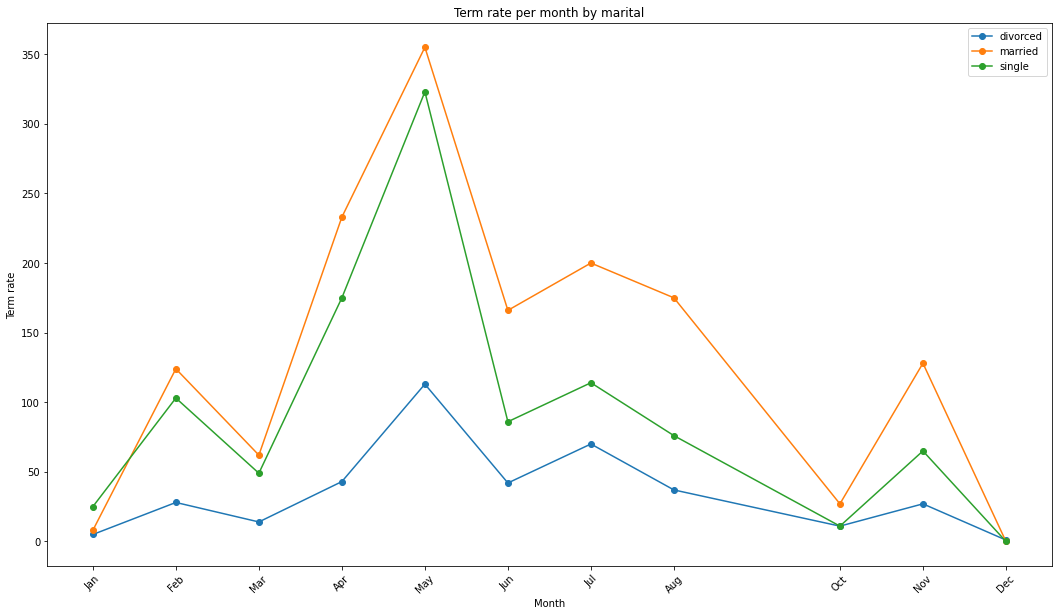

In [125]:
# Change month to integer
month_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12}
df2 = df.copy()
df2['month'].replace(month_dict, inplace = True)

# Pivot tables
pivot_tab_mth1 = df2.pivot_table('class', index = 'month', columns = 'job', aggfunc = 'sum')
pivot_tab_mth2 = df2.pivot_table('class', index = 'month', columns = 'housing', aggfunc = 'sum')
pivot_tab_mth3 = df2.pivot_table('class', index = 'month', columns = 'marital', aggfunc = 'sum')


tick = list(pivot_tab_mth1.index)
labels =['Jan', 'Feb', 'Mar', 'Apr',  'May', 'Jun', 
         'Jul','Aug','Oct', 'Nov','Dec'
        ]


# plots
pivot_tab_mth1.plot(marker = 'o', figsize = (18,10))
plt.xlabel('Month')
plt.ylabel('Term rate')
plt.title('Term rate per month by job')
plt.xticks(tick, labels, rotation = 45)
plt.legend(loc = 0)
plt.show()


pivot_tab_mth2.plot(marker = 'o', figsize = (18,10))
plt.xlabel('Month')
plt.ylabel('Term rate')
plt.title('Term rate per month by housing')
plt.xticks(tick, labels, rotation = 45)
plt.legend(loc = 0)
plt.show()

pivot_tab_mth3.plot(marker = 'o', figsize = (18,10))
plt.xlabel('Month')
plt.ylabel('Term rate')
plt.title('Term rate per month by marital')
plt.xticks(tick, labels, rotation = 45)
plt.legend(loc = 0)
plt.show()






### Duration Vs Target

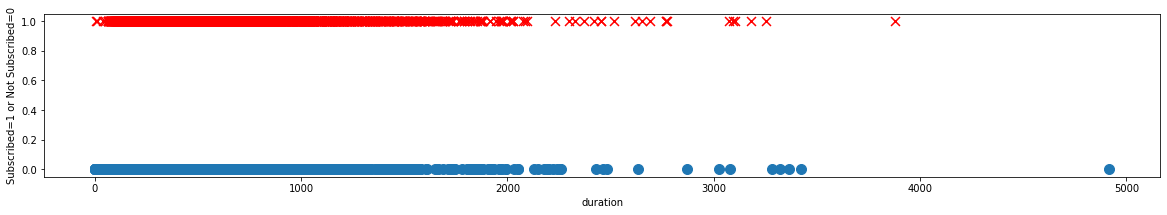

In [114]:
pos = df['class'].to_numpy() == 1
neg = df['class'].to_numpy() == 0
# Target vs features
fig,ax=plt.subplots(1, 1, figsize=(20, 3), sharey=True)
ax.scatter(df["duration"].to_numpy()[pos], df['class'].to_numpy()[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(df["duration"].to_numpy()[neg], df['class'].to_numpy()[neg], marker='o', s=100, label="y=0")
ax.set_xlabel('duration')
ax.set_ylabel("Subscribed=1 or Not Subscribed=0")
plt.show()

### Campaign Vs Target

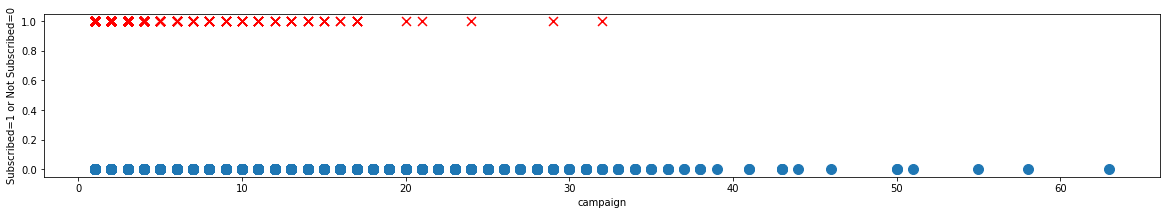

In [115]:
pos = df['class'].to_numpy() == 1
neg = df['class'].to_numpy() == 0
# Target vs features
fig,ax=plt.subplots(1, 1, figsize=(20, 3), sharey=True)
ax.scatter(df["campaign"].to_numpy()[pos], df['class'].to_numpy()[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(df["campaign"].to_numpy()[neg], df['class'].to_numpy()[neg], marker='o', s=100, label="y=0")
ax.set_xlabel('campaign')
ax.set_ylabel("Subscribed=1 or Not Subscribed=0")
plt.show()